# Optimizer

### Minimizer

Minimize objective function using scipy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

In [12]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X, Y)) # For tracing
    return Y

In [13]:
X_guess = 2.0
min_result = spo.minimize(f, X_guess, method="SLSQP", options={"disp":True})
print("Minima found at:")
print("X = {}, Y = {}".format(min_result.x, min_result.fun))

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5


X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


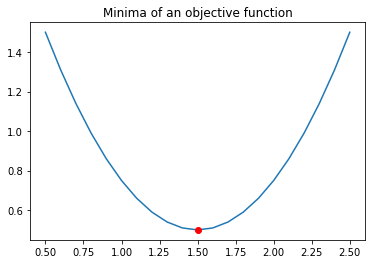

In [15]:
X_plot = np.linspace(0.5, 2.5, 21)
Y_plot = f(X_plot)
plt.plot(X_plot, Y_plot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of an objective function")
plt.show()

### Convex Problems

Line between any two points of the graph always lies above the graph in between the points of the line.

### Parametrized Models

f(X) = C0 + C1*X

In [17]:
def error(line, data):
    # err = sum((actual - predicted) ^ 2)
    # predicted = Ci0 + Ci1*Xi
    err = np.sum((data[:, 1] - (line[0] + line[1] * data[:, 0]))**2)
    return err

Original Line: C0=2.0, C1=4.0


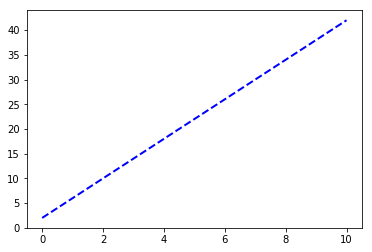

In [18]:
# Original Line
l_orig = np.float32([2, 4])
print("Original Line: C0={}, C1={}".format(l_orig[0], l_orig[1]))
X_orig = np.linspace(0, 10, 21)
Y_orig = l_orig[0] + l_orig[1] * X_orig
plt.plot(X_orig, Y_orig, 'b--', linewidth=2.0, label="Original Line")
plt.show()

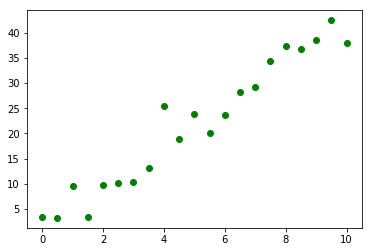

In [19]:
# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Y_orig.shape)
data = np.asarray([X_orig, Y_orig + noise]).T
plt.plot(data[:,0], data[:,1], "go", label="Data Points")
plt.show()

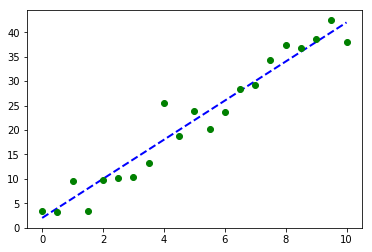

In [20]:
plt.plot(X_orig, Y_orig, 'b--', linewidth=2.0, label="Original Line")
plt.plot(data[:,0], data[:,1], "go", label="Data Points")
plt.show()

In [52]:
def fit_line(data, err_func):
    # Generate initial guess for the line model
    l = np.float32([0, np.mean(data[:,1])])
    
    # Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] + l[1]*x_ends, 'm--', linewidth=2.0, label="Initial Guess")
    
    # Call optimizer to minimize error function
    result = spo.minimize(err_func, l, args = (data,), method="SLSQP", options={"disp":True})
    return result.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 182.14807869711439
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6


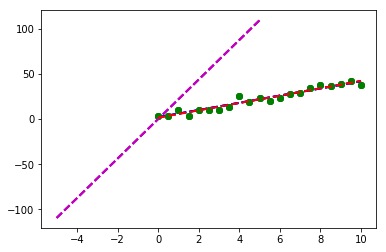

In [53]:
plt.plot(X_orig, Y_orig, 'b--', linewidth=2.0, label="Original Line")
plt.plot(data[:,0], data[:,1], "go", label="Data Points")

l_fit = fit_line(data, error)
Y_fit = l_fit[0] + l_fit[1] * X_orig
plt.plot(X_orig, Y_fit, 'r--', linewidth=2.0, label="Fitting Line")
plt.show()

### Polynomial Optimizers